<h1>Machine Learning : Home-made Regression</h1>

In [28]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib
np.random.seed(74628)

Using matplotlib backend: module://ipympl.backend_nbagg


Most of the code here could be reduce to a few sklearn function. But for comprehension it is good to understand the process in depth.

In [29]:
#Model Building and Evaluating functions
def model(x, teta):
    return (x.dot(teta))

def cost_function(x, y, teta):
    m = len(y)
    return((1/(2*m))*np.sum((model(x, teta)-y)**2))

def gradient(x, y, teta):
    m = len(y)
    return((1/m)*x.T.dot((model(x, teta)-y)))

def steepest_descent(teta, lr, x, y, n_iter):
    cost_history = []
    for i in range(n_iter):
        teta = teta - lr*gradient(x, y, teta)
        cost_history.append(cost_function(x, y, teta))
    return(teta, cost_history)

def coeff_determination(y_pred, y):
    u = np.sum((y - y_pred)**2)
    v = np.sum((y - np.mean(y))**2)
    return(1 - (u/v))

<h2>1) Simple Linear Regression Models</h2>

<h3>A) Random Problem</h3>

Generating and processing the data:

In [30]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
#we have to reshape y. x and y must have the same shape
y = y.reshape(100, 1)
print(y.shape)
print(x.shape)

(100, 1)
(100, 1)


In [31]:
plt.scatter(x=x, y=y)
plt.xlabel("x")
plt.ylabel("y")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'y')

In [4]:
#we use a matrix implementation of 'y = ax + b' : 'Y = XO' where O (teta) is a vector contaning a and b
x = np.hstack(tup=(x, np.ones(x.shape)))
print(x.shape)

(100, 2)


In [5]:
#we randomly initialize a and b parameter, inside the teta vector
teta = np.array(np.random.randn(2, 1))
print(teta.shape)

(2, 1)


Building Model

a =  [-0.53631517]
b =  [-3.38777987]


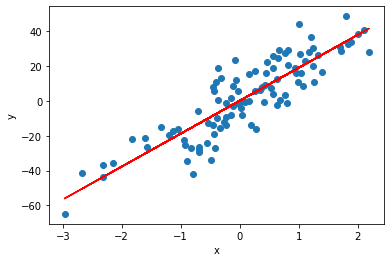

In [7]:
teta_optim, cost_history = steepest_descent(teta, 0.01, x, y, 5000)
predict = model(x, teta_optim)
plt.scatter(x=x[:, 0].reshape(y.shape[0], 1), y=y)
plt.plot(x[:, 0].reshape(y.shape[0], 1), predict, 'r')
plt.xlabel("x")
plt.ylabel("y")
print("a = ", teta[0])
print("b = ", teta[1])

Evaluating the model

Text(0.5, 0, 'iteration')

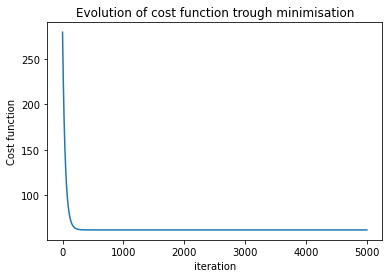

In [8]:
#Viewing the learning process
plt.plot(cost_history)
plt.title("Evolution of cost function trough minimisation")
plt.ylabel("Cost function")
plt.xlabel("iteration")

In [10]:
print("R² = ", coeff_determination(predict, y))
print("{:.2f}% of the dataset variance is explained by the model".
      format(coeff_determination(predict, y)*100))

R² =  0.7607815910915239
76.08% of the dataset variance is explained by the model


<h2>2) Polynomial Regression Model</h2>

<h3>A) Random Problem</h3>

Generating and processing the data :

In [11]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
#we have to reshape y. x and y must have the same shape
y = y + abs(y/2)
y = y.reshape(100, 1)
print(y.shape)
print(x.shape)

(100, 1)
(100, 1)


Text(0, 0.5, 'y')

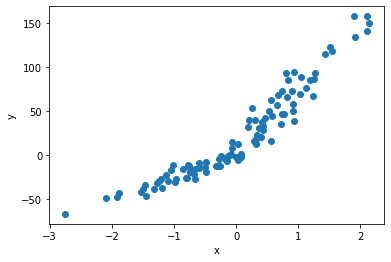

In [12]:
plt.scatter(x=x, y=y)
plt.xlabel("x")
plt.ylabel("y")

In [13]:
#we use a matrix implementation of 'y = ax² + bx +c' : 'Y = XO' where O (teta) is a vector contaning a ,b, and c
#we only have to change X and teta !
X = np.hstack(tup=(x, np.ones(x.shape)))
X = np.hstack(tup=(x**2, X))
print(X.shape)

(100, 3)


In [14]:
#we randomly initialize a, b, and c parameter, inside the teta vector
teta = np.array(np.random.randn(3, 1))
print(teta.shape)

(3, 1)


Training the model :

a =  [-1.00140197]
b =  [0.27153443]
c =  [0.67970395]


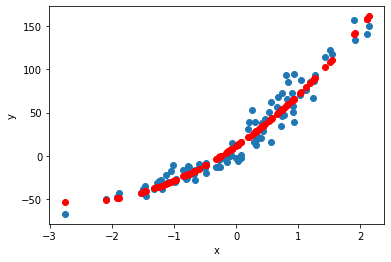

In [15]:
teta_optim, cost_history = steepest_descent(teta, 0.01, X, y, 5000)
predict = model(X, teta_optim)
plt.scatter(x=x[:, 0], y=y)
plt.scatter(x=x[:, 0], y=predict, c='r')
plt.xlabel("x")
plt.ylabel("y")
print("a = ", teta[0])
print("b = ", teta[1])
print("c = ", teta[2])

Evaluating the model :

Text(0.5, 0, 'iteration')

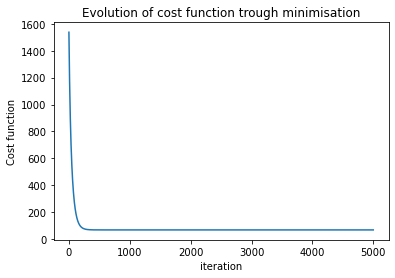

In [16]:
#Viewing the learning process
plt.plot(cost_history)
plt.title("Evolution of cost function trough minimisation")
plt.ylabel("Cost function")
plt.xlabel("iteration")

In [17]:
print("R² = ", coeff_determination(predict, y))
print("{:.2f}% of the dataset variance is explained by the model".
      format(coeff_determination(predict, y)*100))

R² =  0.9489319975649504
94.89% of the dataset variance is explained by the model


<h2>3) Multiple Linear Regression Model</h2>

<h3>A) Random Problem</h3>

Generating and Processing data :

In [32]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
y = y.reshape(100, 1)
print(y.shape)
print(x.shape)

(100, 1)
(100, 2)


In [33]:
#Visualising
%matplotlib widget
figure = plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs=x[:, 0], ys=y, zs=x[:, 1], c='b')
ax.set_xlabel('X1')
ax.set_zlabel('Y')
ax.set_ylabel('X2')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'X2')

In [34]:
#We want a model : Y = a1*X1 + a2*X2 + b where X1 and X2 are predictives variables
X = np.hstack(tup=(x, np.ones(shape=(x.shape[0], 1))))
print(X.shape)

(100, 3)


In [35]:
#we randomly initialize a1, a2, and b parameter, inside the teta vector
teta = np.array(np.random.randn(3, 1))
print(teta.shape)

(3, 1)


Training the model :

In [36]:
teta_optim, cost_history = steepest_descent(teta, 0.01, X, y, 5000)
predict = model(X, teta_optim)

In [38]:
%matplotlib widget
figure = plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs=X[:, 0], ys=y, zs=X[:, 1], c='b')
ax.scatter3D(xs=X[:, 0], ys=predict, zs=X[:, 1], c='r')
ax.set_xlabel('X1')
ax.set_zlabel('Y')
ax.set_ylabel('X2')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'X2')

Evaluating the model :

Text(0.5, 0, 'iteration')

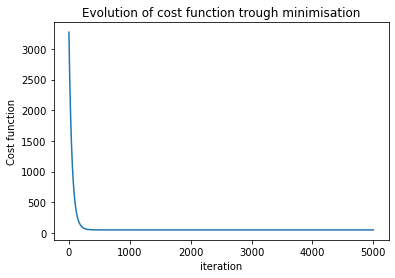

In [12]:
#Viewing the learning process
%matplotlib inline
plt.plot(cost_history)
plt.title("Evolution of cost function trough minimisation")
plt.ylabel("Cost function")
plt.xlabel("iteration")

In [16]:
print("R² = ", coeff_determination(predict, y))
print("{:.2f}% of the dataset variance is explained by the model".
      format(coeff_determination(predict, y)*100))

R² =  0.9849795670974101
98.50% of the dataset variance is explained by the model
